### SVM — sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#using seaborn plotting defaults
import seaborn as sns; sns.set()

In [47]:
#【基本知识补充】
#random_state参数：https://blog.csdn.net/yangyiwxl/article/details/71641355
#numpy.random.RandomState函数用法:https://blog.csdn.net/xylin1012/article/details/71931900
#numpy.random.rand使用方法：https://blog.csdn.net/you_are_my_dream/article/details/53494801
#make_blobs官方文档：http://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_blobs.html

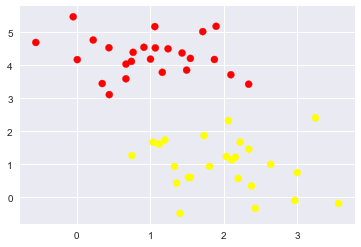

In [45]:
#1）随机生成点，并画图
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=[0.6,0.8]) #X返回array[n_samples, n_features] ，y返回array [n_samples] 值为0或1
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn') #绘制散点图

#### sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

n_samples: int, optional (default=100) 
待生成的样本的总数。 

n_features: int, optional (default=2) 
每个样本的特征数。 

centers: int or array of shape [n_centers, n_features], optional (default=3) 
要生成的样本中心（类别）数，或者是确定的中心点。 

cluster_std: float or sequence of floats, optional (default=1.0) 
每个类别的方差，例如我们希望生成2类数据，其中一类比另一类具有更大的方差，可以将cluster_std设置为[1.0,3.0]。 

center_box: pair of floats (min, max), optional (default=(-10.0, 10.0)) 

shuffle: boolean, optional (default=True) 
Shuffle the samples. 

random_state: int, RandomState instance or None, optional (default=None) 

Returns:	
X : array of shape [n_samples, n_features]
The generated samples.

y : array of shape [n_samples]
The integer labels for cluster membership of each sample.


In [ ]:
#随机画几条线，看看哪个好
#参考plt.scatter参数解释：https://blog.csdn.net/qiu931110/article/details/68130199
#np.linspace(): https://blog.csdn.net/grey_csdn/article/details/54561796

(-1, 3.5)

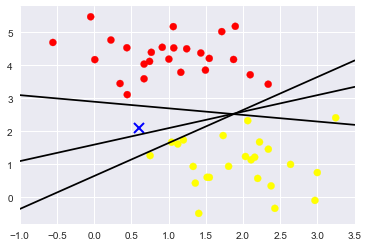

In [49]:
xfit = np.linspace(-1, 3.5) #返回等间隔数列，默认为50个
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn') #生成散点图，前2个参数导入数据，c控制color，s代表点大小，cmap风格
plt.plot([0.6], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10) #生成了一个点，图中蓝色的

for m, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]: #绘制3条直线
    plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1, 3.5)

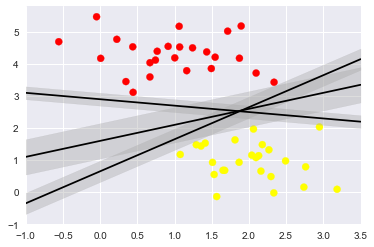

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha=0.4)
    
    plt.xlim(-1, 3.5)

In [10]:
#训练一个SVM 
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
#绘图
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #create grid to evaluate model
    x = np.linspace(xlim[0], ylim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

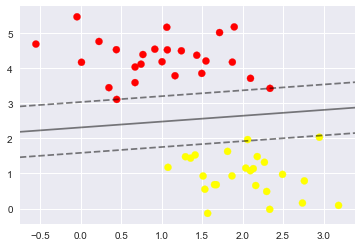

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* 这条线就是我们希望得到的决策边界啦

* 观察发现有3个点做了特殊的标记，它们恰好都是边界上的点

* 它们就是我们的*support vectors*（支持向量）

* 在Scikit-Learn中, 它们存储在这个位置 ``support_vectors_``（一个属性）

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* 观察可以发现，只需要支持向量我们就可以把模型构建出来

* 接下来我们尝试一下，用不同多的数据点，看看效果会不会发生变化

* 分别使用60个和120个数据点

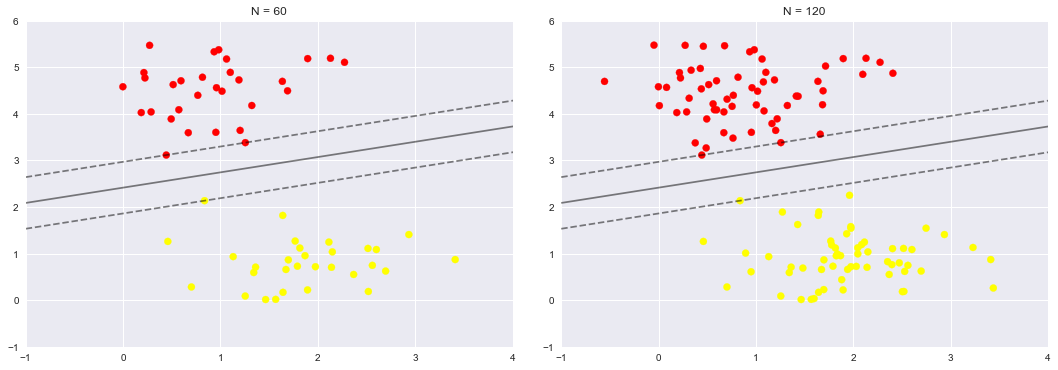

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

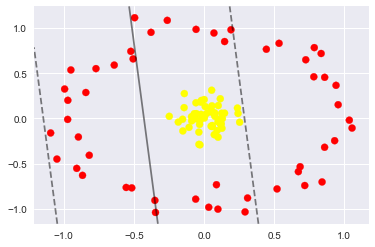

In [15]:
#引入核函数
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [16]:
X

array([[-0.84289714,  0.28668676],
       [-0.97141273,  0.20019597],
       [ 0.05783655, -0.09013482],
       [ 0.23858923,  0.11463802],
       [ 0.00865353,  0.13112762],
       [-0.02049297,  0.04448981],
       [ 0.0931796 , -0.13500309],
       [-0.01914979,  0.19862659],
       [-0.51527623, -0.76952863],
       [-1.09406529, -0.16136327],
       [ 0.07744048,  0.02346097],
       [ 0.07586985,  0.06175104],
       [-0.05667602,  0.98569279],
       [-0.02205874,  0.17953692],
       [-0.03153951, -0.06636487],
       [ 0.05650262,  0.13907422],
       [-0.89610794, -0.20601016],
       [-0.64037003,  0.59030353],
       [ 0.07095701,  0.94526139],
       [ 0.86039286, -0.31984221],
       [ 0.05453065,  0.31196065],
       [-0.24779675,  0.02293436],
       [ 0.84231865, -0.70389093],
       [-1.04924768, -0.45044639],
       [-0.77068021,  0.55124563],
       [-0.97273488, -0.01133495],
       [ 0.10057956, -0.20846537],
       [-0.81863492, -0.40821969],
       [-0.05757876,

In [17]:
y

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1])

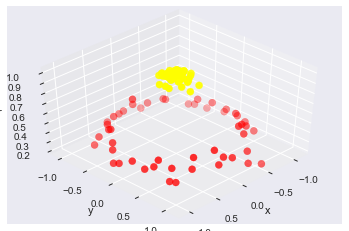

In [18]:
#加入了新的维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [19]:
#加入径向基函数
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

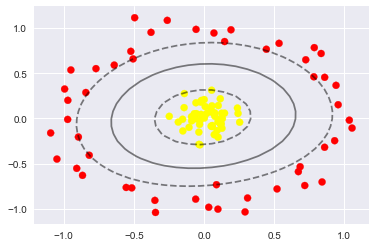

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

使用这种核支持向量机，我们学习一个合适的非线性决策边界。这种核变换策略在机器学习中经常被使用！

In [22]:
# 调节SVM参数：Soft Margin问题
# 调节C参数
#* 当C趋近于无穷大时：意味着分类严格不能有错误
#* 当C趋近于很小的时：意味着可以有更大的错误容忍

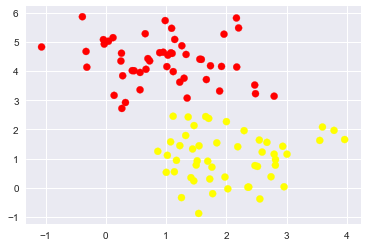

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

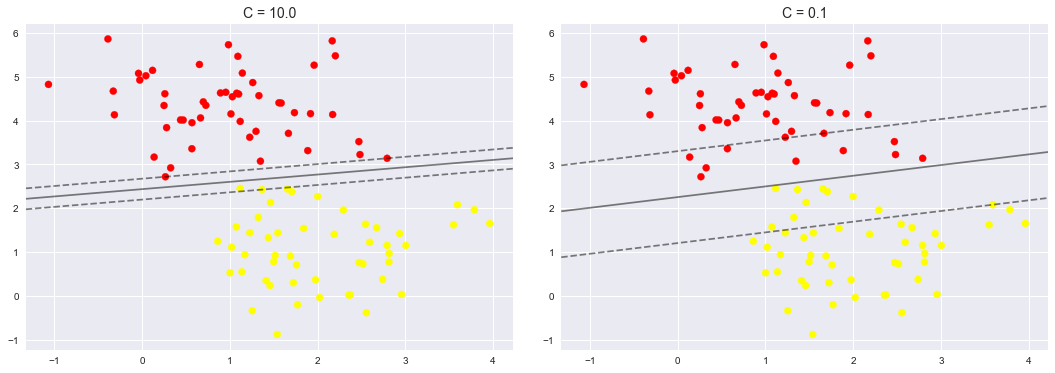

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

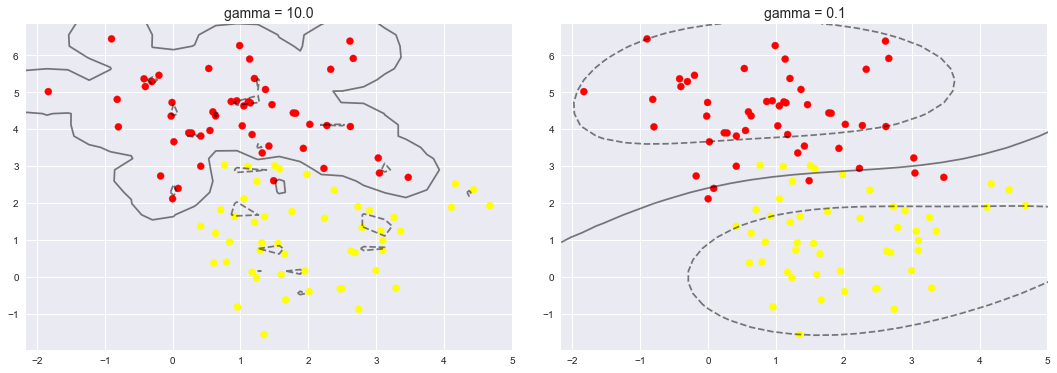

In [25]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)